In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser
import numpy as np


In [107]:
tests_literature = [
    'FedPOC 2', # This
    'FedAVG 2', # This
    'FedPOC 4', # This
    'FedAVG 4', # This
    'FedPOC 5', # This
    'FedAVG 6', # This
]
tests = [
    'FedCIA teste 1',
    'FedCIA teste 4',
    'FedCIA teste 7', # This
    'FedCIA teste 10',
    'FedCIA teste 13',
    'FedCIA teste 16',
    'FedCIA teste 19',
    'FedCIA teste 22',
    'FedCIA teste 25',
    'FedCIA teste 28',
    'FedCIA teste 31',
    'FedCIA teste 34',

    'FedCIA teste 2',
    'FedCIA teste 5',
    'FedCIA teste 8',
    'FedCIA teste 11',
    'FedCIA teste 14',
    'FedCIA teste 17',
    'FedCIA teste 20',
    'FedCIA teste 23',
    'FedCIA teste 26',
    'FedCIA teste 29',
    'FedCIA teste 32',
    'FedCIA teste 35',


    'FedCIA teste 3',
    'FedCIA teste 6',
    'FedCIA teste 9',
    'FedCIA teste 12',
    'FedCIA teste 15',
    'FedCIA teste 18',
    'FedCIA teste 21',
    'FedCIA teste 24',
    'FedCIA teste 27',
    'FedCIA teste 30',
    'FedCIA teste 33',
    'FedCIA teste 36',
]

In [108]:
#round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,l_fit_acc,l_fit_loss,dynamic_engagement,old_dynamic_engagement,is_selected,desire,size,cost,willing,r_intention,miss,epoch,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
# fig, ax = plt.subplots(figsize=(7,5))
client_data_literature = pd.read_csv('logs-literature/c-data.csv')
client_data = pd.read_csv('logs/c-data.csv')
client_data_literature.tail()
# sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=client_data, errorbar=('ci', False), hue=)


,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients
3595,25,11,avg,default,dnn,0.523409,3.848423,0.384154,25.602316,0.975410,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3596,25,8,avg,default,dnn,0.780312,0.811755,0.433373,50.328331,0.969785,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3597,25,7,avg,default,dnn,0.785114,0.718619,0.528211,13.890777,0.968069,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3598,25,6,avg,default,dnn,0.773109,0.776871,0.300120,109.830894,0.978227,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3599,25,2,avg,default,dnn,0.764988,0.881813,0.275779,40.362026,0.970564,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75


In [109]:

# Lendo o arquivo de configuração
def read_config(filename, section):
    config = ConfigParser()
    config.read(filename)
    if section in config:
        return config[section]
    else:
        raise ValueError(f"Section '{section}' not found in the configuration file.")

def filter_dataframe(df:pd.DataFrame, config):
    # Construindo a expressão de filtro com base na configuração
    filter_expressions = []
    for key, value in config.items():
        if key in df.columns:
            column_type = type(df[key].dtypes)
            if key == 'rounds':
                continue
            if column_type == np.dtypes.BoolDType:
                typed_value = str(value.lower() in ['true', 'yes', '1'])
            elif column_type in [np.dtypes.Int64DType, np.dtypes.Float64DType]:
                typed_value = value
            else:
                typed_value = f"'{value.lower()}'"  # Adiciona aspas para garantir que seja tratado como string
            if key == 'strategy':
                filter_expressions.append(f"(client_data['{key}'] == {typed_value})")
            else:
                filter_expressions.append(f"(client_data['{key}'] == {typed_value})")
    filter_expressions.append("(client_data['rounds'] <= 25)")
    filter_expression = " & ".join(filter_expressions)
    # print(filter_expression)
    filtered_df = df.loc[eval(filter_expression)]
    return filtered_df

def filter_dataframe_literature(df:pd.DataFrame, config):
    # Construindo a expressão de filtro com base na configuração
    filter_expressions = []
    for key, value in config.items():
        if key in df.columns:
            column_type = type(df[key].dtypes)
            if key == 'rounds':
                continue
            if column_type == np.dtypes.BoolDType:
                typed_value = str(value.lower() in ['true', 'yes', '1'])
            elif column_type in [np.dtypes.Int64DType, np.dtypes.Float64DType]:
                typed_value = value
            else:
                typed_value = f"'{value.lower()}'"  # Adiciona aspas para garantir que seja tratado como string
            if key == 'strategy':
                filter_expressions.append(f"(client_data_literature['{key}'] == {typed_value})")
            else:
                filter_expressions.append(f"(client_data_literature['{key}'] == {typed_value})")
    # filter_expressions.append("(client_data_literature['rounds'] <= 25)")
    filter_expression = " & ".join(filter_expressions)
    # print(filter_expression)
    filtered_df = df.loc[eval(filter_expression)]
    return filtered_df

In [110]:
configs = [read_config('config-debug.ini', config) for config in tests]
configs
configs_literature = [read_config('config-debug-literature.ini', config) for config in tests_literature]
configs_literature

[<Section: FedPOC 2>,
 <Section: FedAVG 2>,
 <Section: FedPOC 4>,
 <Section: FedAVG 4>,
 <Section: FedPOC 5>,
 <Section: FedAVG 6>]

## GRafico IC: 0.25

In [111]:
the_configs = []
the_configs_literature = []
for config in configs:
    if config.getfloat('init_clients') == 0.25:
        the_configs.append(config)

for config in configs_literature:
    print(config.getfloat('init_clients'))
    if config.getfloat('init_clients') == 0.25:
        the_configs_literature.append(config)
the_configs


0.25
0.25
0.5
0.75
0.75
0.75


[<Section: FedCIA teste 1>,
 <Section: FedCIA teste 4>,
 <Section: FedCIA teste 7>,
 <Section: FedCIA teste 10>,
 <Section: FedCIA teste 13>,
 <Section: FedCIA teste 16>,
 <Section: FedCIA teste 19>,
 <Section: FedCIA teste 22>,
 <Section: FedCIA teste 25>,
 <Section: FedCIA teste 28>,
 <Section: FedCIA teste 31>,
 <Section: FedCIA teste 34>]

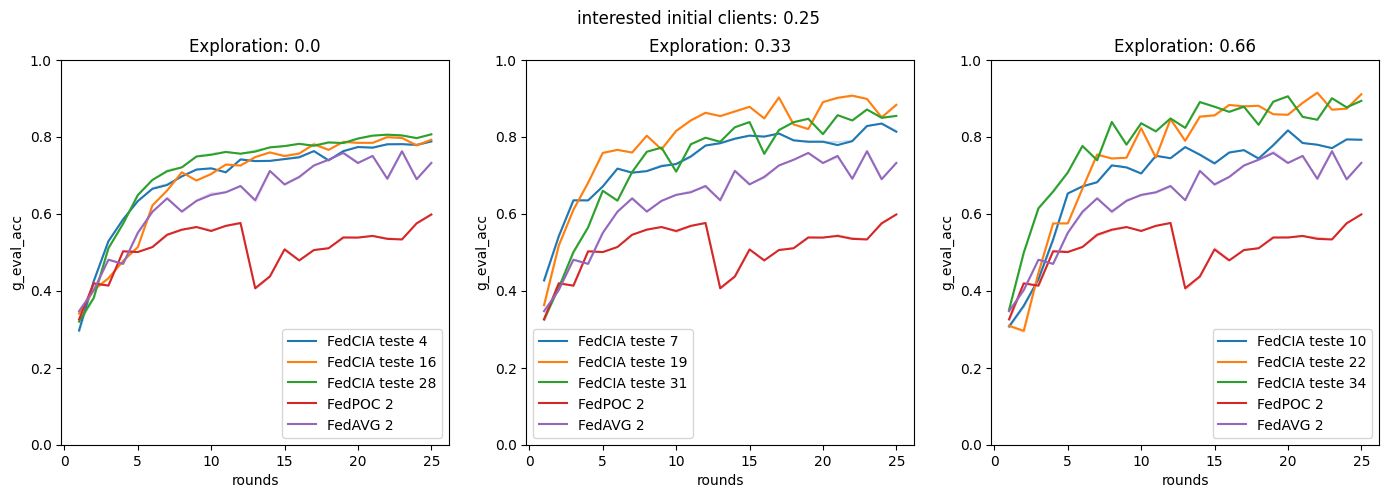

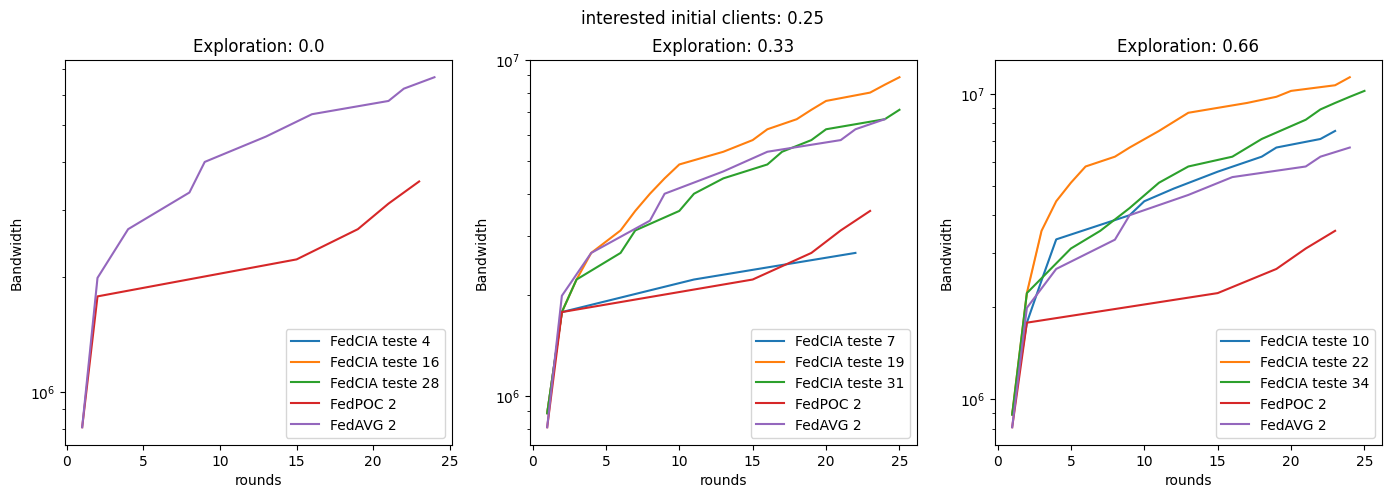

In [112]:
fig_1, ax_acc = plt.subplots(1,3, figsize=(17,5))
fig_2, ax_bw = plt.subplots(1,3, figsize=(17,5))
fig_1.suptitle("interested initial clients: 0.25")
fig_2.suptitle("interested initial clients: 0.25")
for conf in the_configs:
    filtered_data = filter_dataframe(client_data, conf)
    if conf.getfloat('exploration') == 0.33:
        sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 0.66:
        sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 1.00:
        sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))

ax_acc[0].set_title("Exploration: 0.0")
ax_acc[0].set_ylim(0,1)
ax_acc[1].set_title("Exploration: 0.33")
ax_acc[1].set_ylim(0,1)
ax_acc[2].set_title("Exploration: 0.66")
ax_acc[2].set_ylim(0,1)

ax_bw[0].set_title("Exploration: 0.0")
ax_bw[1].set_title("Exploration: 0.33")
ax_bw[2].set_title("Exploration: 0.66")
ax_bw[0].set_ylabel("Bandwidth")
ax_bw[0].set_yscale("log")
ax_bw[1].set_ylabel("Bandwidth")
ax_bw[1].set_yscale("log")
ax_bw[2].set_ylabel("Bandwidth")
ax_bw[2].set_yscale("log")

for conf in the_configs_literature:
    filtered_data = filter_dataframe_literature(client_data_literature, conf)
    sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))

## GRafico IC: 0.50

In [113]:
the_configs = []
the_configs_literature = []
for config in configs:
    if config.getfloat('init_clients') == 0.50:
        the_configs.append(config)

for config in configs_literature:
    print(config.getfloat('init_clients'))
    if config.getfloat('init_clients') == 0.50:
        the_configs_literature.append(config)
the_configs


0.25
0.25
0.5
0.75
0.75
0.75


[<Section: FedCIA teste 2>,
 <Section: FedCIA teste 5>,
 <Section: FedCIA teste 8>,
 <Section: FedCIA teste 11>,
 <Section: FedCIA teste 14>,
 <Section: FedCIA teste 17>,
 <Section: FedCIA teste 20>,
 <Section: FedCIA teste 23>,
 <Section: FedCIA teste 26>,
 <Section: FedCIA teste 29>,
 <Section: FedCIA teste 32>,
 <Section: FedCIA teste 35>]

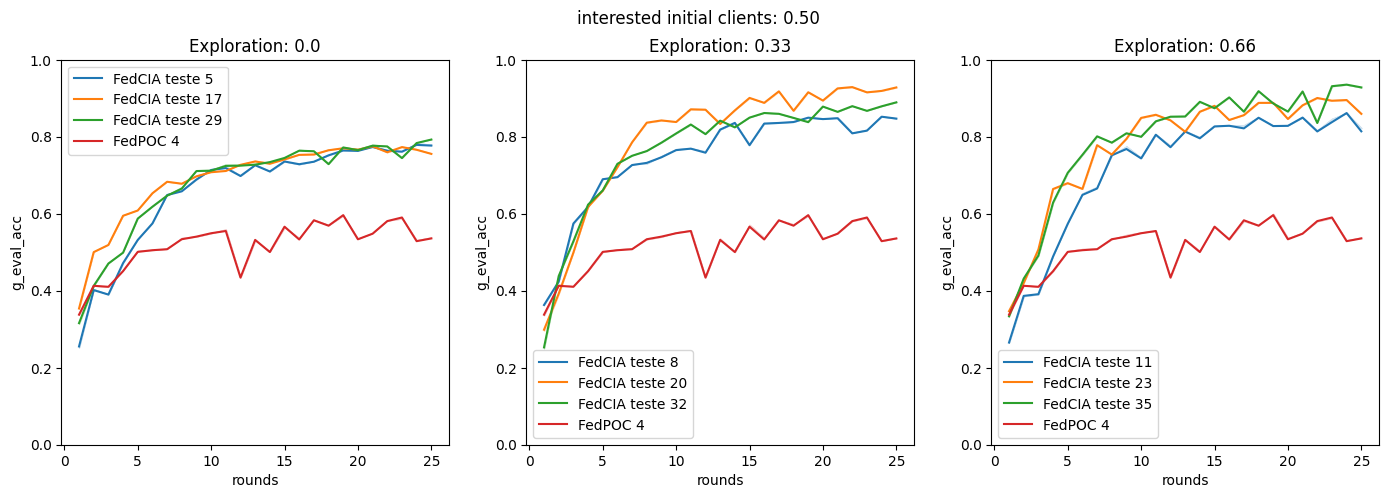

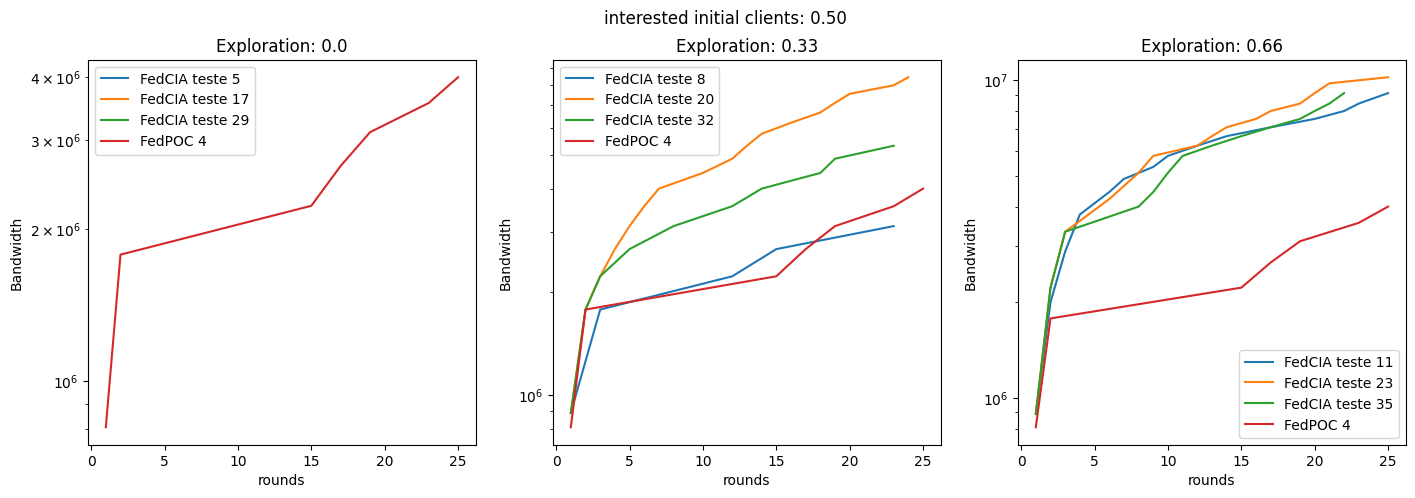

In [114]:
fig_1, ax_acc = plt.subplots(1,3, figsize=(17,5))
fig_2, ax_bw = plt.subplots(1,3, figsize=(17,5))
fig_1.suptitle("interested initial clients: 0.50")
fig_2.suptitle("interested initial clients: 0.50")


for conf in the_configs:
    filtered_data = filter_dataframe(client_data, conf)
    if conf.getfloat('exploration') == 0.33:
        sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 0.66:
        sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 1.00:
        sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
ax_acc[0].set_title("Exploration: 0.0")
ax_acc[0].set_ylim(0,1)
ax_acc[1].set_title("Exploration: 0.33")
ax_acc[1].set_ylim(0,1)
ax_acc[2].set_title("Exploration: 0.66")
ax_acc[2].set_ylim(0,1)

ax_bw[0].set_title("Exploration: 0.0")
ax_bw[1].set_title("Exploration: 0.33")
ax_bw[2].set_title("Exploration: 0.66")

ax_bw[0].set_ylabel("Bandwidth")
ax_bw[0].set_yscale("log")
ax_bw[1].set_ylabel("Bandwidth")
ax_bw[1].set_yscale("log")
ax_bw[2].set_ylabel("Bandwidth")
ax_bw[2].set_yscale("log")
for conf in the_configs_literature:
    filtered_data = filter_dataframe_literature(client_data_literature, conf)
    sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))

## GRafico IC: 0.75

In [124]:
the_configs = []
the_configs_literature = []
for config in configs:
    if config.getfloat('init_clients') == 0.75:
        the_configs.append(config)

for config in configs_literature:
    print(config.getfloat('init_clients'))
    if config.getfloat('init_clients') == 0.75:
        the_configs_literature.append(config)
the_configs


0.25
0.25
0.5
0.75
0.75
0.75


[<Section: FedCIA teste 3>,
 <Section: FedCIA teste 6>,
 <Section: FedCIA teste 9>,
 <Section: FedCIA teste 12>,
 <Section: FedCIA teste 15>,
 <Section: FedCIA teste 18>,
 <Section: FedCIA teste 21>,
 <Section: FedCIA teste 24>,
 <Section: FedCIA teste 27>,
 <Section: FedCIA teste 30>,
 <Section: FedCIA teste 33>,
 <Section: FedCIA teste 36>]

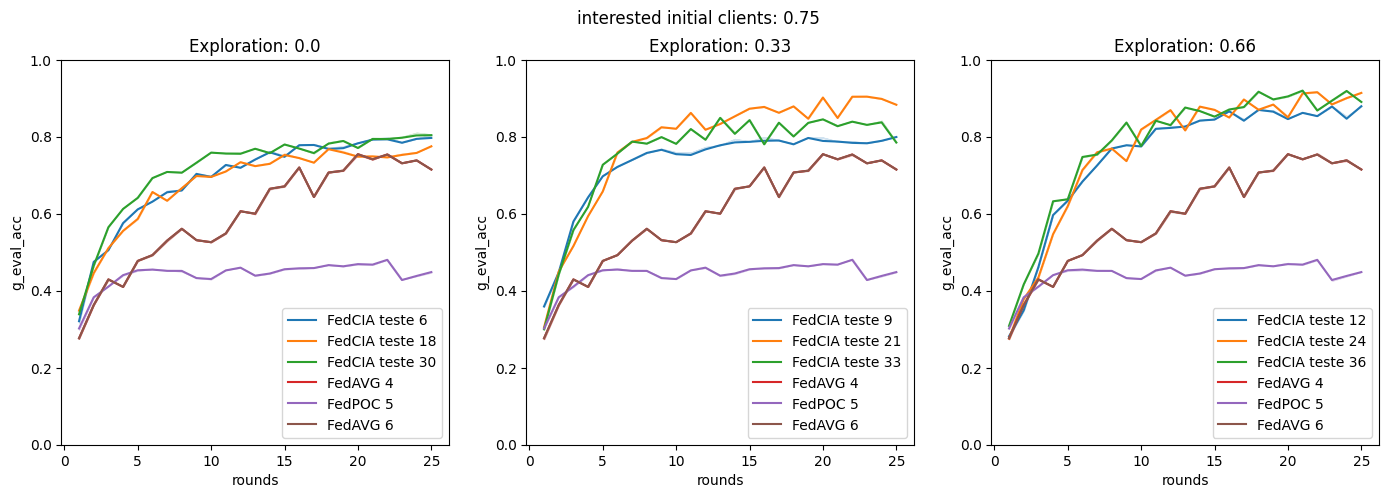

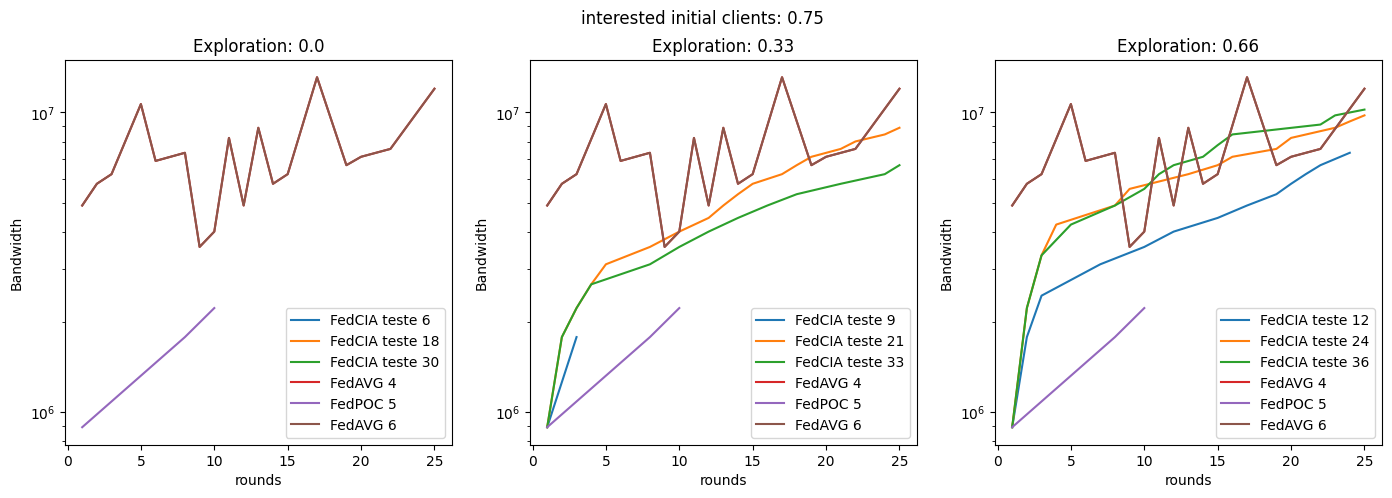

In [125]:
fig_1, ax_acc = plt.subplots(1,3, figsize=(17,5))
fig_2, ax_bw = plt.subplots(1,3, figsize=(17,5))
fig_1.suptitle("interested initial clients: 0.75")
fig_2.suptitle("interested initial clients: 0.75")
for conf in the_configs:
    filtered_data = filter_dataframe(client_data, conf)
    if conf.getfloat('exploration') == 0.33:
        sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 0.66:
        sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 1.00:
        sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
for conf in the_configs_literature:
    filtered_data = filter_dataframe_literature(client_data_literature, conf)
    sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
ax_acc[0].set_title("Exploration: 0.0")
ax_acc[0].set_ylim(0,1)
ax_acc[1].set_title("Exploration: 0.33")
ax_acc[1].set_ylim(0,1)
ax_acc[2].set_title("Exploration: 0.66")
ax_acc[2].set_ylim(0,1)

ax_bw[0].set_title("Exploration: 0.0")
ax_bw[1].set_title("Exploration: 0.33")
ax_bw[2].set_title("Exploration: 0.66")
ax_bw[0].set_ylabel("Bandwidth")
ax_bw[0].set_yscale("log")
ax_bw[1].set_ylabel("Bandwidth")
ax_bw[1].set_yscale("log")
ax_bw[2].set_ylabel("Bandwidth")
ax_bw[2].set_yscale("log")


## ALL

In [117]:
config = read_config('config-debug.ini', tests[0])
filter_dataframe(client_data, config)

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients
0,1,10,cia,default,dnn,0.273709,9.027062,0.408163,34.222786,0.909070,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
1,1,11,cia,default,dnn,0.252101,9.200123,0.332533,32.820244,0.811143,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
2,1,4,cia,default,dnn,0.314526,8.361816,0.272509,79.221687,0.884311,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
3,1,7,cia,default,dnn,0.370948,16.805048,0.450180,29.465622,0.829351,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
4,1,8,cia,default,dnn,0.273709,8.738793,0.378151,34.970158,0.875101,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25,11,cia,default,dnn,0.917167,0.308874,0.402161,25.392521,0.978401,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
296,25,3,cia,default,dnn,0.918465,0.318921,0.567146,21.096333,0.983067,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
297,25,8,cia,default,dnn,0.919568,0.336049,0.420168,36.516438,0.981742,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25
298,25,2,cia,default,dnn,0.906475,0.398456,0.296163,44.944530,0.984464,...,1,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0,0.25


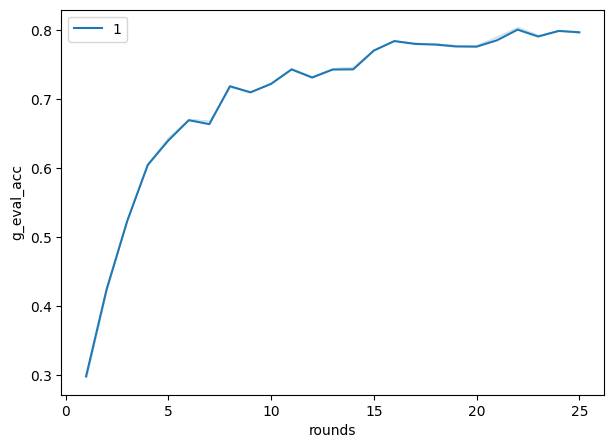

In [118]:
fig, ax = plt.subplots(figsize=(7,5))
config = read_config('config-debug.ini', tests[0])
filtered_data = filter_dataframe(client_data, config)
# print(filtered_data)
sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=filtered_data, label=f'1', errorbar=('ci', False))
ax.legend()

In [119]:
da = {'a':1}
len(da.values())

1

(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)
(300, 32)


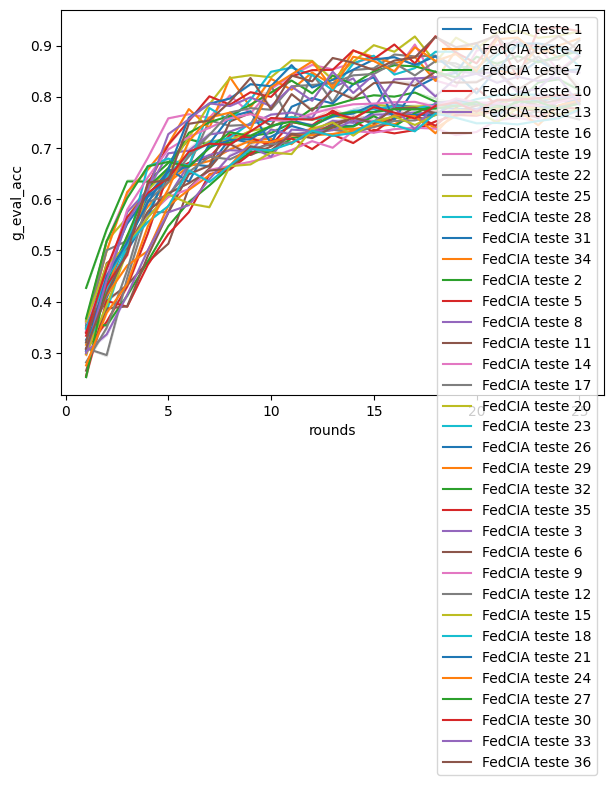

In [120]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    print(filtered_data.shape)
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=filtered_data, label=f'{config.name}', errorbar=('ci', False))
# ax.legend(bbox_to_anchor=(1, 1), ncol=10)
ax.legend()

In [121]:
# tests[1]

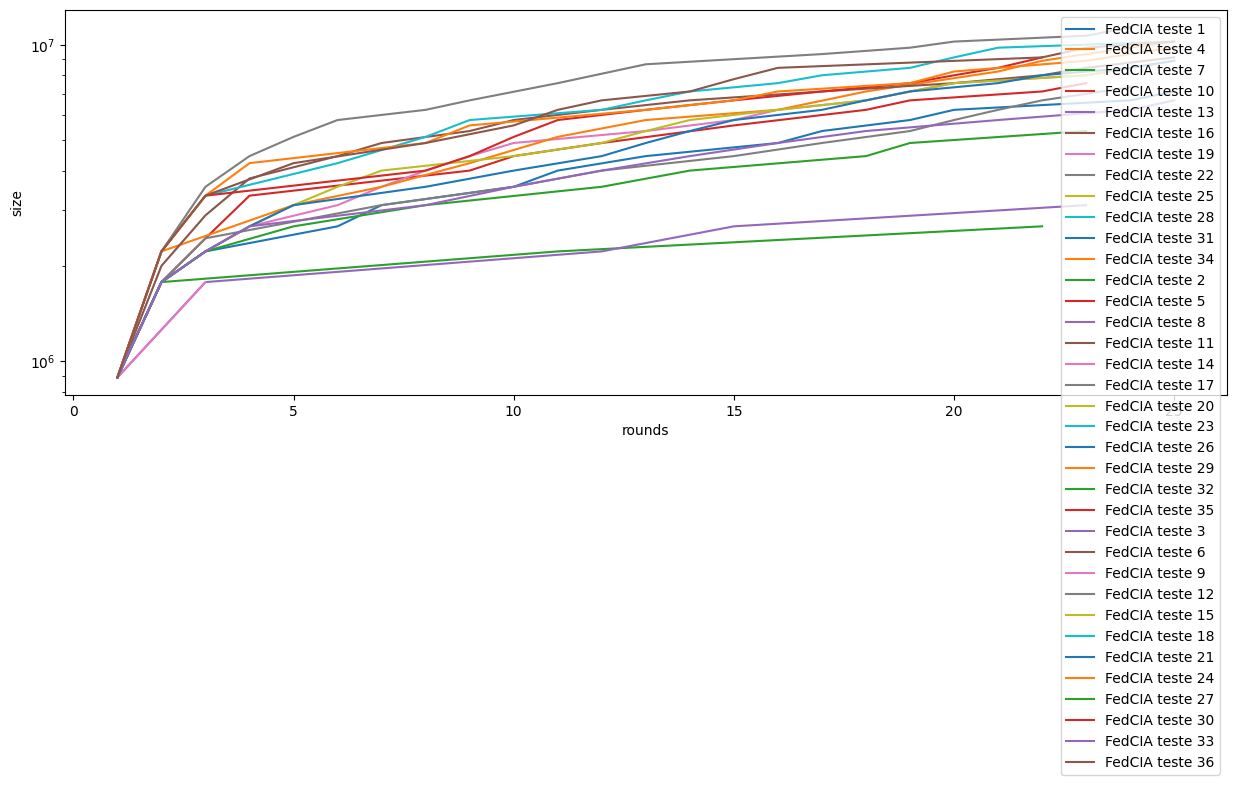

In [122]:
fig, ax = plt.subplots(figsize=(15,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    # print(filtered_data.shape)
    if filtered_data.shape[0] > 0:
        sns.lineplot(ax=ax, x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{config.name}', errorbar=('ci', False))
# ax.legend(bbox_to_anchor=(0.5, 1.5), ncol=10)
ax.legend()
ax.set_yscale('log')

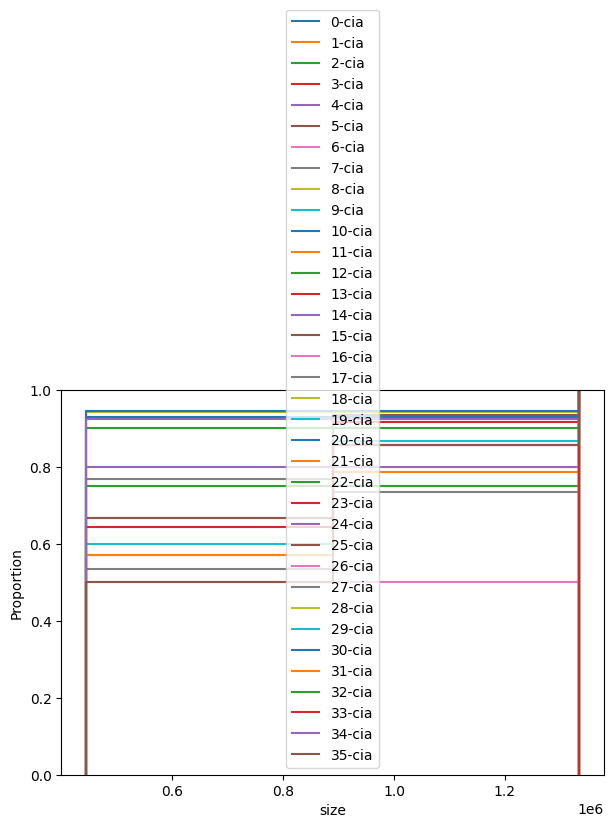

In [123]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True) & (filtered_data['old_dynamic_engagement'] == False)]
    filtered_data = filtered_data.groupby('rounds').count() * 444584
    # print(filtered_data)
    # if filtered_data.shape[0] > 0:
    sns.ecdfplot(ax=ax, x='size', data=filtered_data, label=f'{i}-{sol}')
ax.legend()